In [124]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import random
from heapq import *

In [125]:
# this command will download the LFW_people's dataset to hard disk.
lfw_people = fetch_lfw_people(data_home='D:\Senior II\Image Processing\Project\LFW Dataset',
min_faces_per_person = 40, resize = 0.4)


In [126]:
# introspect the images arrays to find the shapes (for plotting)
m, h, w = lfw_people.images.shape
images = lfw_people.images

# Instead of providing 2D data, X has data already in the form of a vector that
# is required in this approach.
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# Print Details about dataset
print("Number of Examples: % d" % m)
print("Number of features: % d" % n_features)
print("Number of Class Labels: % d" % n_classes)

Number of Examples:  1867
Number of features:  1850
Number of Class Labels:  19


Donald Rumsfeld


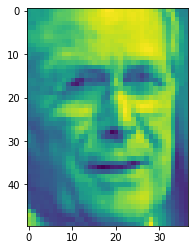

In [127]:
#View an image
index = int(random.random() * images.shape[0])
# index = 0
name = target_names[y[index]]
print(name)
plt.imshow(images[index,:,:])
plt.show()

In [128]:
#Flatten images array
flattened_images = images.reshape(m, -1).T
# N^2 * M
print(f'Shape after flattening: {flattened_images.shape}')

Shape after flattening: (1850, 1867)


In [129]:
# A is the matrix of averaged images
average = np.average(flattened_images, axis = 1, keepdims = True).squeeze()
A = (flattened_images - np.average(flattened_images, axis = 1, keepdims = True))
#n*m
print(A.shape)

(1850, 1867)


In [130]:
# cov = np.matmul(A.T, A)
cov = np.cov(A.T) / n_classes
# m*m
print(f'Covariance Matrix Shape: {cov.shape}')

Covariance Matrix Shape: (1867, 1867)


In [131]:
#eigenvectors are stacked in columns
eigenvalues, v = np.linalg.eig(cov)
print(f'Shape of eigenvalues: {eigenvalues.shape}')
print(f'Shape of eigenvectors: {v.shape}')

Shape of eigenvalues: (1867,)
Shape of eigenvectors: (1867, 1867)


In [132]:
u = np.matmul(A, v)
print(u.shape)

(1850, 1867)


In [133]:
#change choice of K
K = n_features
indices = np.argpartition(eigenvalues, -K)[-K:]
# #use indices to get the top K eigenvectors
X = u[:, indices]
X_inv = np.linalg.inv(X)
w = np.zeros((K, m))
for j in range(K):
    w[:,j] = np.matmul(X_inv, A[:, j])
    
print('w:',w.shape)

C:\Users\EGYPT\AppData\Local\Temp\ipykernel_5472\2365415878.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  w[:,j] = np.matmul(X_inv, A[:, j])


w: (1850, 1867)


In [134]:
index = int(random.random() * images.shape[0])
#take on image from A randomly
test_image = A[:, index] - average
#flatten test image
test_image_flattened = test_image.reshape(-1, 1)
# print(test_image_flattened.shape)
w_test = np.zeros((K, 1))
w_test = np.matmul(X_inv, test_image_flattened)

er = np.argmin(np.sum((w_test - w) ** 2, axis = 0))

In [135]:
#show test image
name = target_names[y[index]]
predicted_name = target_names[y[er]]
# plt.imshow(images[index, :, :])
# plt.show()
# plt.imshow(images[er, :, :])
# plt.show()
print('Name:', name)
print('Predicted:', predicted_name)

Name: Jacques Chirac
Predicted: Hugo Chavez


In [138]:
#Test in a loop
count = 0
trials = 1000
for i in range(trials):
    index = int(random.random() * images.shape[0])
    #take on image from A randomly
    test_image = A[:, index] - average
    #flatten test image
    test_image_flattened = test_image.reshape(-1, 1)
    # print(test_image_flattened.shape)
    w_test = np.zeros((K, 1))
    w_test = np.matmul(X_inv, test_image_flattened)

    er = np.argmin(np.sum((w_test - w) ** 2, axis = 0))

    name = target_names[y[index]]
    predicted_name = target_names[y[er]]

    if(name == predicted_name):
        count += 1
print(f'Accuracy: {(count / trials) * 100}%')

Accuracy: 3.9%
